In [1]:
import tonic
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn as nn
import torch
import norse.torch as snn
import random
from IPython.utils import io
%matplotlib ipympl
# %matplotlib tk
plt.rcParams["image.cmap"] = "bone"

In [2]:
def integrate_and_record_voltages(cell):
    def integrate(input_spike_train):
        T = input_spike_train.shape[0]
        s = None
        spikes = []
        voltage_trace = []
        for ts in range(T):
            z, s = cell(input_spike_train[ts], s)
            spikes.append(z)
            voltage_trace.append(s.v)
        return torch.stack(spikes), torch.stack(voltage_trace)
    return integrate

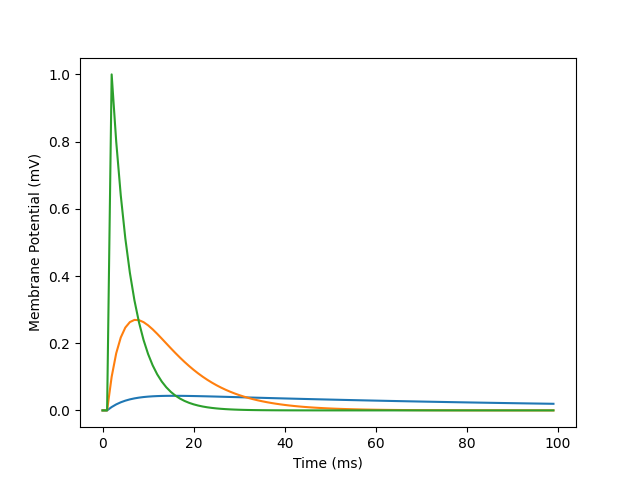

In [3]:
for tau in [0.1,0.01, 0.001]:
    activation = integrate_and_record_voltages(snn.LIFCell(p=snn.LIFParameters(
        # tau_syn_inv=torch.as_tensor(1 / tau),# larger: shorter decay, smaller spike
        tau_mem_inv=torch.as_tensor(1 / tau) # larger: shorter decay, larger spike
        )))

    data = torch.zeros(100,1)
    idxs = random.sample(range(1, 50), 15)
    idxs=[1]
    data[idxs] =  1.0
    out, v = activation(data)
    idxs
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane Potential (mV)')
    plt.plot(v.detach(), label="tau_mem: "+str(tau), )

In [4]:
# plt.rcParams['axes.prop_cycle']

In [5]:
for i, idx in enumerate(idxs):
    if i == 0:
        plt.axvline(idx,  label="Input Spikes")
    else:
        plt.axvline(idx, color='#ff7f0e')

# j=0
# for i, s in enumerate(out.detach()):
#     if s!=0:
#         if j == 0:
#             j=1
#             plt.axvline(i, color='#2ca02c', label="Output Spikes")
#         else:
#             plt.axvline(i, color='#2ca02c')

plt.ylim(0,1.5)
plt.xlim(0,100)
plt.legend()

In [6]:
plt.savefig("../img/LIF-v2.png")